# Perkenalan

Muhammad Bintang Ramadhan  
Data Science Batch 08

# Import Pustaka

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#Model
from sklearn.cluster import KMeans, SpectralClustering as sc, AgglomerativeClustering as AC

#Evaluation model (Metrics)
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
#Function untuk plot silhoutte
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

# Import Data

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
#agar memudahkan dalam codingan maka kolom-kolom dataset saya ganti menjadi lowercase
df.columns = map(str.lower, df.columns)

In [5]:
#Mengambil Fresh data untuk Model Inference
test_for_inference = df.iloc[8750:8950,1:18]
test_for_inference.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8750,8.346980,0.181818,390.0,0.0,390.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1500.0,410.528786,30.784961,0.000000,12
8751,0.546067,0.090909,228.0,0.0,228.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,238.695115,16.127297,0.000000,12
8752,0.979061,0.272727,0.0,0.0,0.0,329.930650,0.0,0.000000,0.000000,0.083333,1,0,500.0,1316.748413,1.721007,1.000000,12
8753,0.223351,0.090909,336.0,0.0,336.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.000000,12
8754,455.471255,1.000000,389.7,44.7,345.0,276.902382,1.0,0.083333,0.916667,0.083333,4,14,1000.0,48.594194,3644.171310,0.090909,12


In [6]:
#Dropdata sample yang telah diambil untuk test di Model Inference
df = df.drop(df.index[8750:8950])
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750 entries, 0 to 8749
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8750 non-null   object 
 1   balance                           8750 non-null   float64
 2   balance_frequency                 8750 non-null   float64
 3   purchases                         8750 non-null   float64
 4   oneoff_purchases                  8750 non-null   float64
 5   installments_purchases            8750 non-null   float64
 6   cash_advance                      8750 non-null   float64
 7   purchases_frequency               8750 non-null   float64
 8   oneoff_purchases_frequency        8750 non-null   float64
 9   purchases_installments_frequency  8750 non-null   float64
 10  cash_advance_frequency            8750 non-null   float64
 11  cash_advance_trx                  8750 non-null   int64  
 12  purcha

-   Terdapat 8950 rows dan 18 columns, Kebanyakan kolom tipe data numerik hanya cust_id yang memiliki data kategorik.  
-   Ada Missing Value di kolom credit_limit dan minimum_payments

In [8]:
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    303
prc_full_payment                      0
tenure                                0
dtype: int64

Missing Value  
-   minimum_payments : 303  
-   credit_limit : 1

In [9]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8749.000000,8750.000000,8447.000000,8750.000000,8750.000000
mean,1590.167158,0.878903,1017.075577,602.536045,414.815719,986.241300,0.488096,0.205088,0.362270,0.135316,3.267657,14.884800,4562.444637,1761.027015,878.105981,0.151298,11.592914
std,2094.992258,0.236390,2157.686376,1676.304058,913.035832,2107.538225,0.401027,0.299942,0.397498,0.200221,6.874553,25.084532,3645.676114,2919.319915,2396.273557,0.290457,1.224673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,134.928231,0.900000,37.792500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1700.000000,397.016105,171.028777,0.000000,12.000000
50%,906.975463,1.000000,366.600000,45.225000,86.735000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,874.442322,321.319929,0.000000,12.000000
75%,2091.616025,1.000000,1133.870000,598.397500,473.550000,1127.761867,0.916667,0.333333,0.750000,0.222222,4.000000,17.000000,6500.000000,1927.248593,846.042195,0.125000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualisasi data

Apakah credit limit berpengaruh terhadap purchase, balance dan installment purchases

Text(0, 0.5, 'Credit limit')

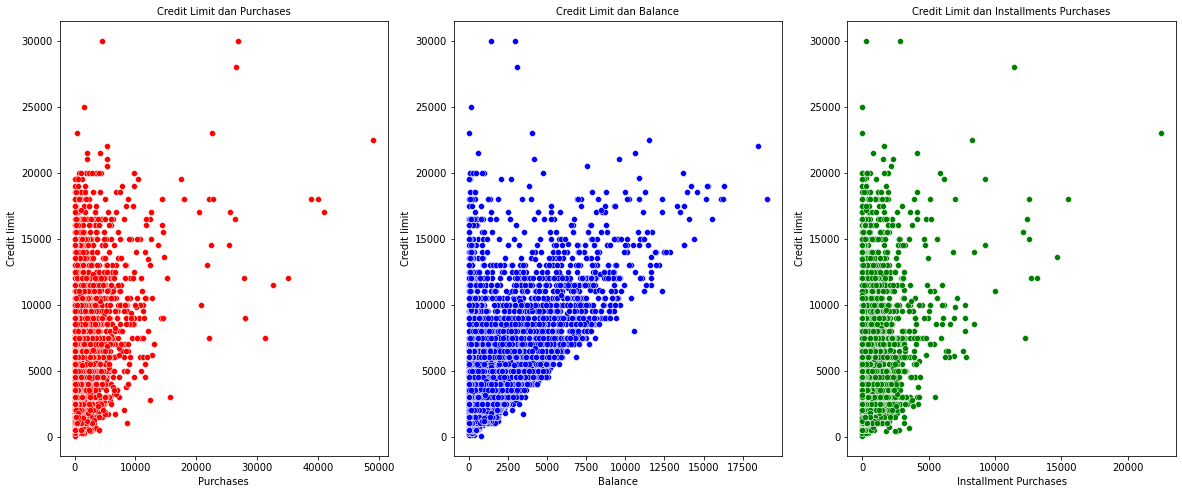

In [10]:
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1,3,1)
sns.scatterplot(df['purchases'],df['credit_limit'], color='red')
plt.title('Credit Limit dan Purchases', fontsize =10)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(1,3,2)
sns.scatterplot(df['balance'],df['credit_limit'], color='blue')
plt.title('Credit Limit dan Balance', fontsize =10)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(1,3,3)
sns.scatterplot(df['installments_purchases'],df['credit_limit'], color='green')
plt.title('Credit Limit dan Installments Purchases', fontsize =10)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

Credit Limit dan Purchases  
-   Kebanyakan tidak ada pengaruh ketika Credit Limit tinggi maka Pembelianpun tinggi.     
-   Hal yang menarik disini adalah mengapa banyak yang meningkatkan Credit Limit tapi tidak melakukan pembelian yang tinggi juga.   
-   Dari hasil analisa saya, kemungkinan meningkatkan Credit Limit untuk berjaga-jaga seandainya terjadi keadaan darurat yang membutuhkan dana besar bisa menggunakan Credit Card yang mencukupi karna memiliki limit yang tinggi.  
  
    
Credit Limit dan Balance  
-   Terlihat adanya pengaruh ketika Credit Limit Tinggi maka Balance meningkat juga.  

Credit Limit dan Installment Purchases  
-   Beberapa perilaku user ketika memiliki Credit_limit tinggi maka Installment Purchases juga meningkat, tapi kebanyakan perilaku user tidak berpengaruh melakukan Installments Purchases ketika Credit Limit tinggi.

Membandingkan Purchase trx dan Cash Advance trx

Text(0.5, 0, 'Purchase_trx')

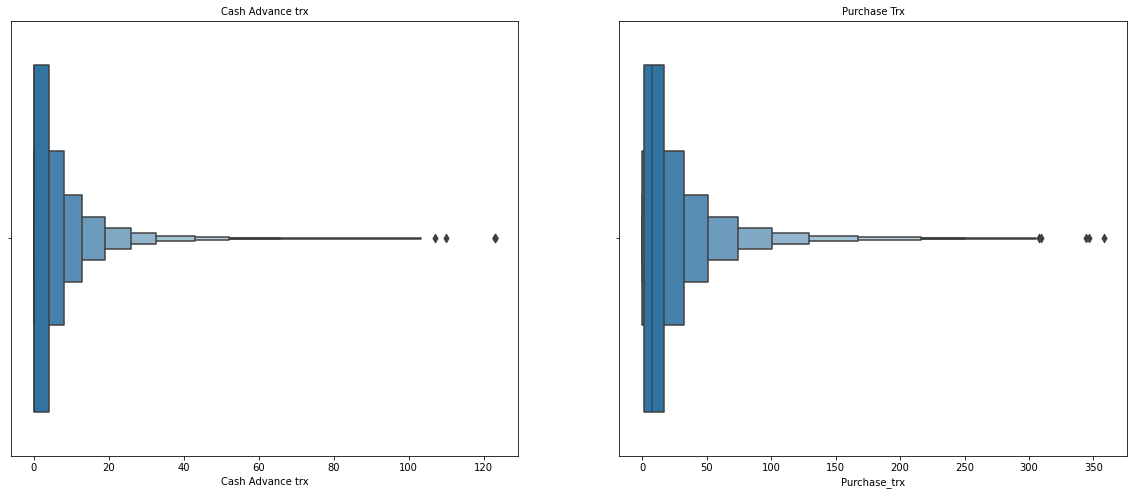

In [11]:
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1,2,1)
sns.boxenplot(df['cash_advance_trx'])
plt.title('Cash Advance trx', fontsize = 10)
plt.xlabel('Cash Advance trx')

plt.subplot(1,2,2)
sns.boxenplot(df['purchases_trx'])
plt.title('Purchase Trx', fontsize =10)
plt.xlabel('Purchase_trx')

Notes: Cash Advance adalah uang tunai hasil penarikan dari kartu kredit 
  
-   Dapat dilihat dari perbandingan diatas bahwa perilaku user lebih banyak transaksi menggunakan kartu kredit langsung daripada transaksi Cash Advance.  

Text(0.5, 0, 'Purchase Installments Freq')

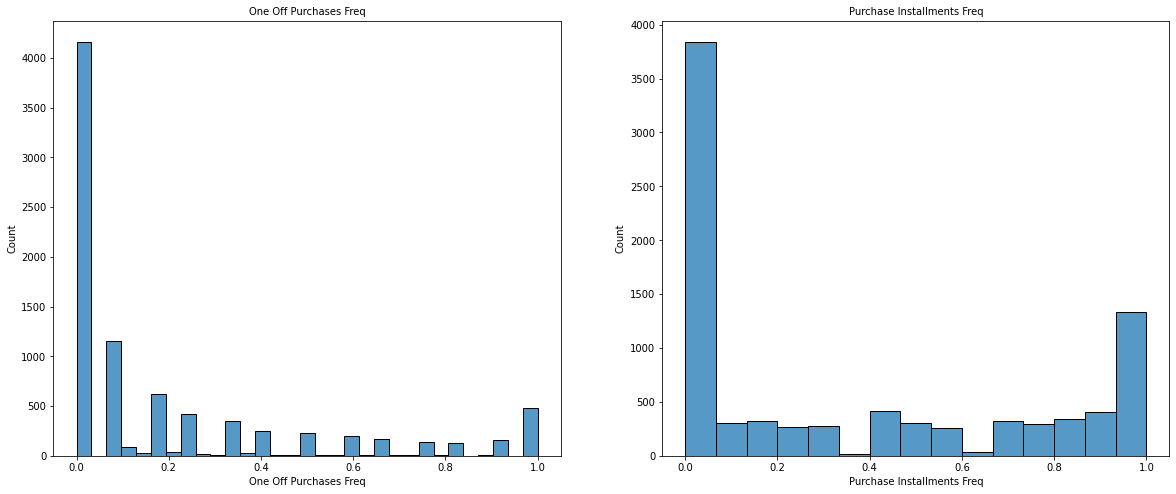

In [12]:
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1,2,1)
sns.histplot(df['oneoff_purchases_frequency'])
plt.title('One Off Purchases Freq', fontsize = 10)
plt.xlabel('One Off Purchases Freq')

plt.subplot(1,2,2)
sns.histplot(df['purchases_installments_frequency'])
plt.title('Purchase Installments Freq', fontsize =10)
plt.xlabel('Purchase Installments Freq')

Notes: Skor antara 1 - 0 (1 = frequently purchased, 0 = not frequently purchased)  
  
One Off Purchases Frequency VS Purchases Installments Frequency  

-   Dapat dilihat bahwa perilaku user menggunakan kartu kredit lebih banyak yang menggunakannya untuk Pembelian cicilan (Installments Purchases) daripada Pembelian sekali beli (One Off Purchases)

<AxesSubplot:>

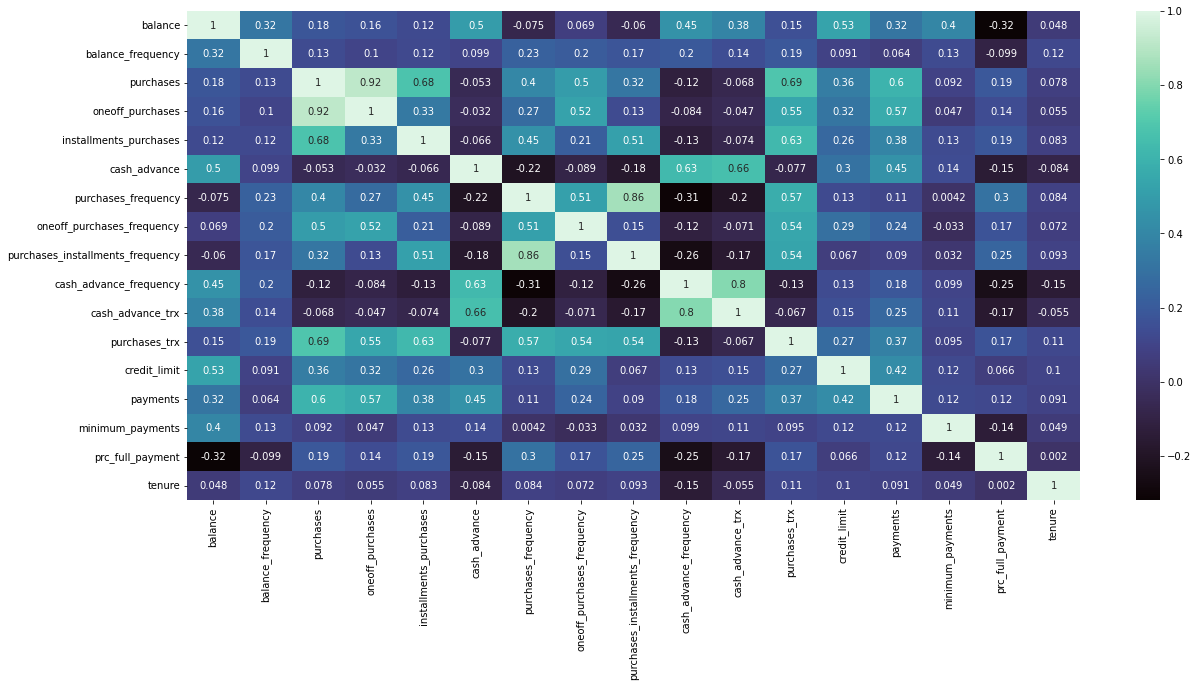

In [13]:
plt.rcParams['figure.figsize'] = (20,9)
sns.heatmap(df.corr(), cmap='mako', annot=True)

Heat Map Korelasi 
-   Terlihat ada Korelasi tinggi 0.92 antara oneoff_purchase dengan purchase, dan juga korelasi tinggi 0.86 antara purchases_frequency dengan purchases_installments_frequency, tetapi sangat wajar sekali ada korelasi antar kolom-kolom tersebut.

In [14]:
misval = df[['minimum_payments', 'credit_limit']]

In [15]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.style.use('seaborn')
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

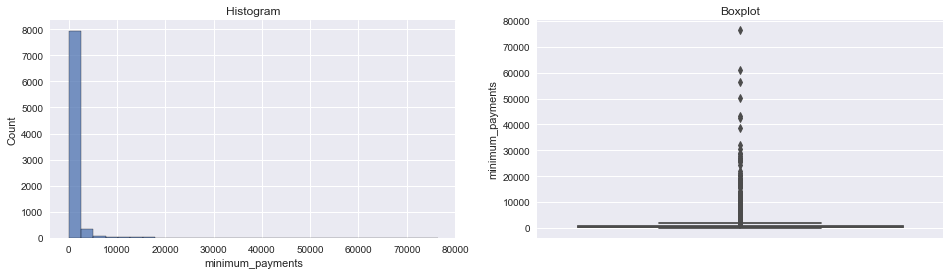

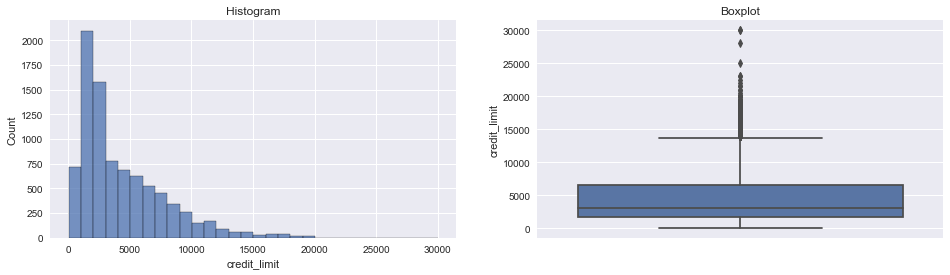

In [16]:
#Melihat distribusi data kolom yang memiliki Missing Value
for var in misval:
    diagnostic_plots(misval, var)

In [17]:
print(df['minimum_payments'].skew())
print(df['credit_limit'].skew())

13.500798234792025
1.5083021840844082


Kedua Kolom yang memiliki Missing Value memiliki distribusi data skewness, maka akan dilakukan Handling Missing Value dengan median.

# Data Preprocessing

In [18]:
#Drop cust_id karna tipe data object dan dirasa tidak berpengaruh terhdap clustering
df.drop(columns=['cust_id'], inplace=True)

### Handling Missing Value

In [19]:
#Imputer Missing Value menggunakan strategy Median karna distribusi data skewness
imputer = SimpleImputer(strategy='median')

In [20]:
df[['minimum_payments', 'credit_limit']] = imputer.fit_transform(df[['minimum_payments', 'credit_limit']])

In [21]:
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## Reductional Dimension (PCA)

In [22]:
#definisi model
pca = PCA()

In [23]:
#train pca
pca.fit(df)

PCA()

In [24]:
#mencari nilai EVR
pca.explained_variance_ratio_.cumsum()

array([0.47251663, 0.65106366, 0.7921081 , 0.90617837, 0.95459339,
       0.98183157, 0.99999202, 0.99999871, 0.99999937, 0.99999996,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

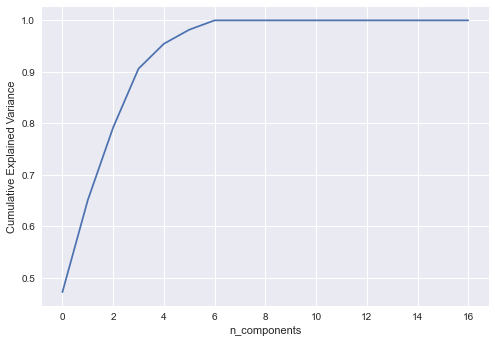

In [25]:
#Mencari nilai EVR dengan pengambilan keputusan menggunakan teknik elbow method
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

-   Dapat dilihat bahwa dari 6 kolom yang telah dilakukan dimensional reduction ini masih dapat membawa informasi hampir seluruhnya.
-   Dari Total 16 kolom informasi dari dataset ini, saya akan melakukan reduce kolom menjadi 6 kolom sebagai nilai n_components  

In [26]:
pca_6 = PCA(n_components=6, whiten=True)

In [27]:
df_red = pca_6.fit_transform(df)

In [28]:
df_red

array([[-9.58516734e-01,  3.41777810e-01,  8.72710575e-02,
        -7.25850612e-02,  3.35016164e-02,  4.63464740e-03],
       [ 8.79278162e-01, -8.67879532e-01,  9.22794178e-01,
        -1.75596825e+00,  3.49295751e-02, -1.33844186e+00],
       [ 3.06240166e-01, -7.06062067e-01, -8.35960532e-01,
         4.71851090e-01, -2.08899397e-01,  3.51266641e-01],
       ...,
       [-8.99286551e-01,  4.81689090e-01,  8.66151935e-02,
        -6.51996033e-02,  1.20986444e-02, -2.05260941e-03],
       [ 5.12180236e-01,  2.09420160e+00,  2.47511569e-01,
        -6.43978905e-02, -6.48610351e-02,  5.84906622e-01],
       [-8.77063063e-01,  2.79104650e-01, -1.39922600e-02,
        -1.29871016e-02,  8.96144369e-02, -7.35951777e-02]])

# Modeling

## KMeans

### Elbow Method

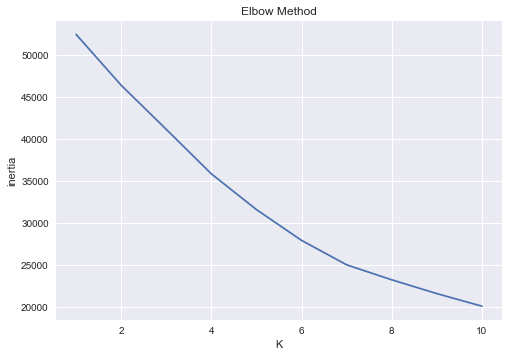

In [29]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(df_red)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

Untuk menentukan nilai n_clusters bisa mengacu pada metriks dari elbow method  
-   Dari plot elbow method diatas saya melihat nilainya adalah 4 karena memilki lekukan siku, namun siku dari plot tersbut dirasa masih meragukan maka untuk memvalidasi argumen ini saya akan menggunakan teknik silhouette untuk validatornya

### Silhouette Method

In [30]:
k=range(2,11)

For n_clusters = 2 The average silhouette_score is : 0.42536322528536896
For n_clusters = 3 The average silhouette_score is : 0.42405458442552635
For n_clusters = 4 The average silhouette_score is : 0.337000414325885
For n_clusters = 5 The average silhouette_score is : 0.34633367564767725
For n_clusters = 6 The average silhouette_score is : 0.34835810788319327
For n_clusters = 7 The average silhouette_score is : 0.3582200349147935
For n_clusters = 8 The average silhouette_score is : 0.3670586559341077
For n_clusters = 9 The average silhouette_score is : 0.3709277681248516
For n_clusters = 10 The average silhouette_score is : 0.37697780613615756


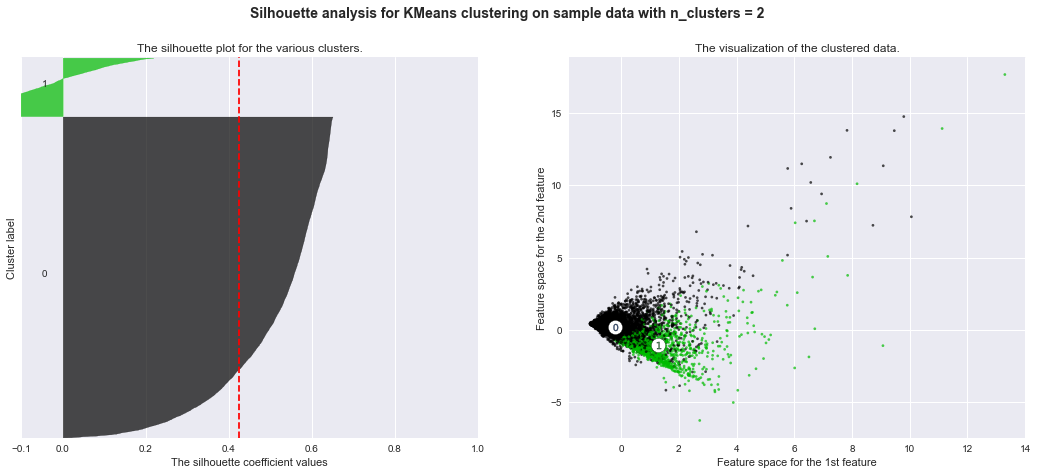

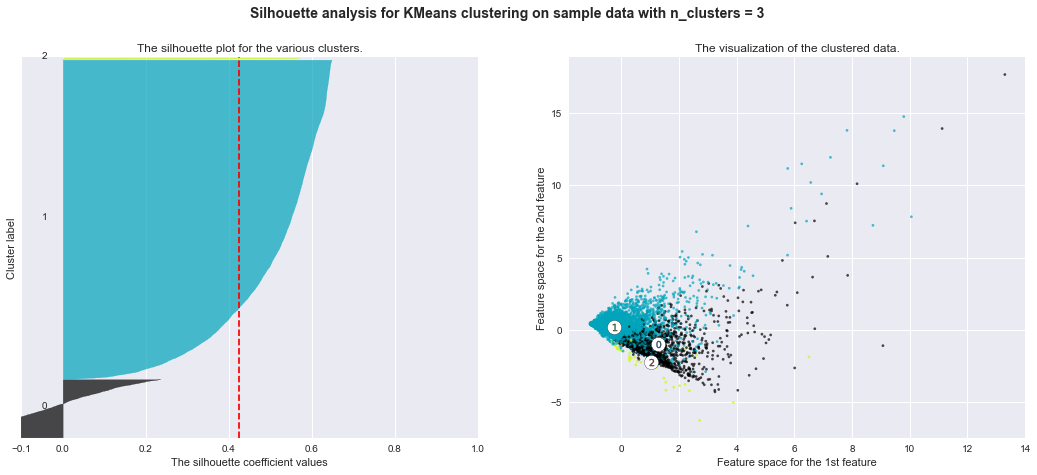

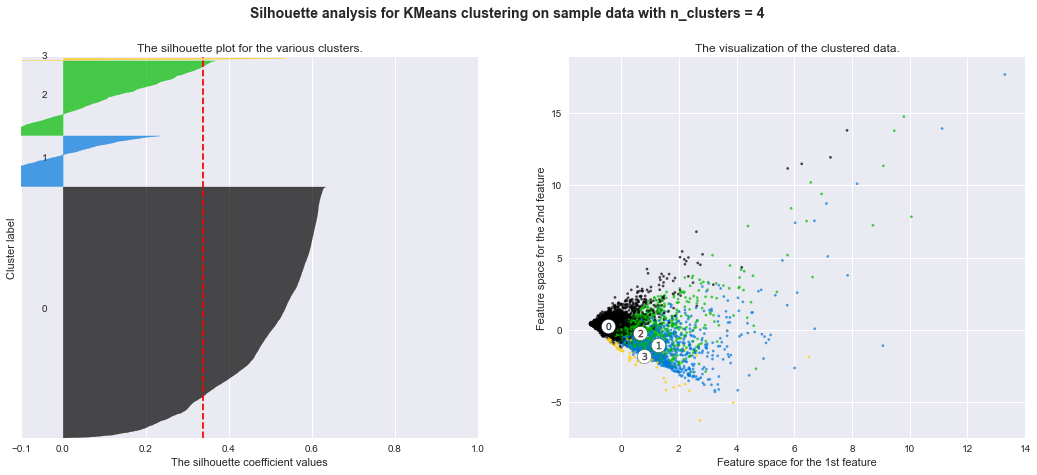

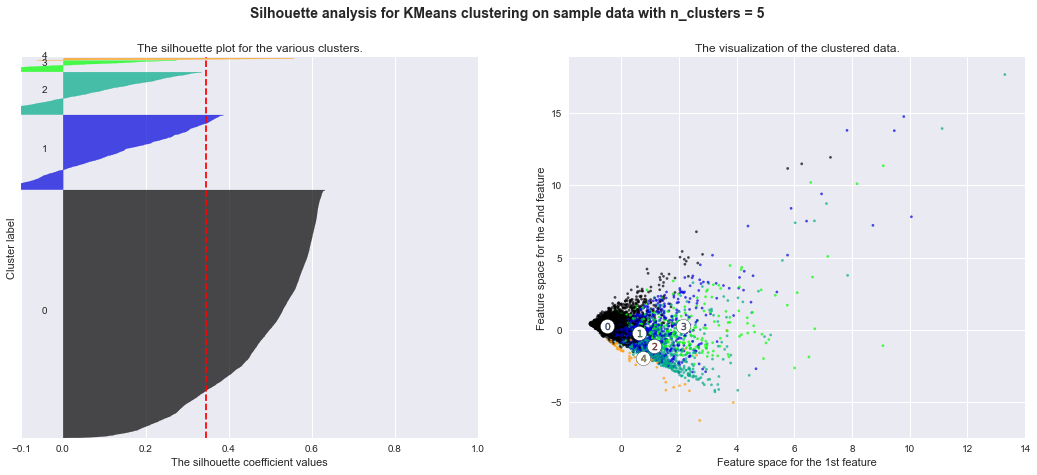

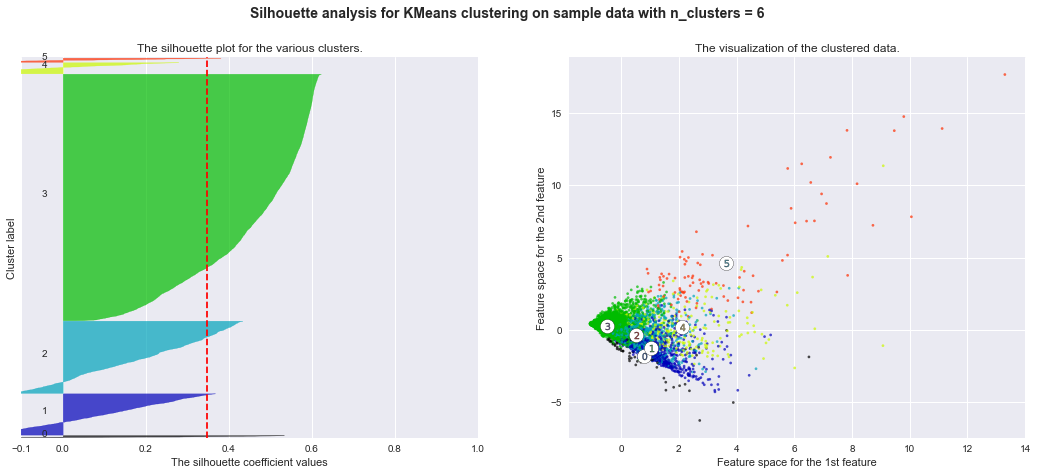

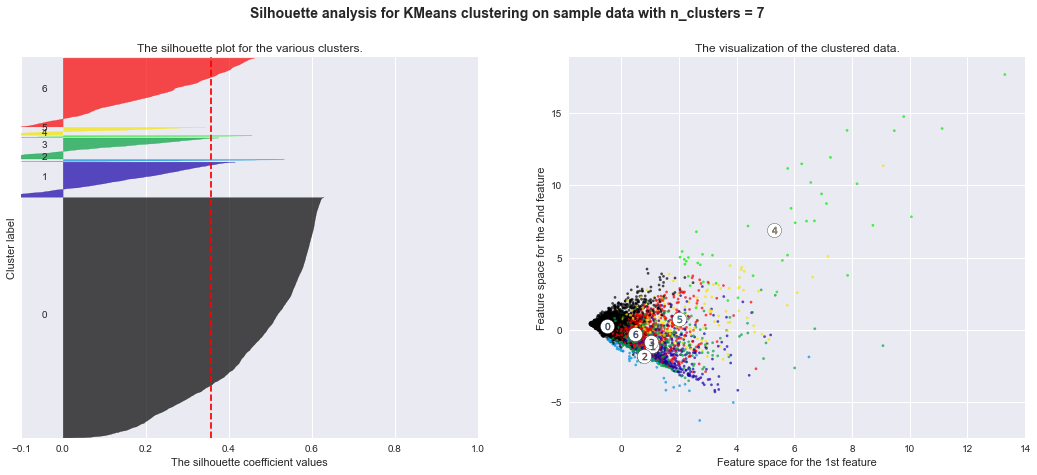

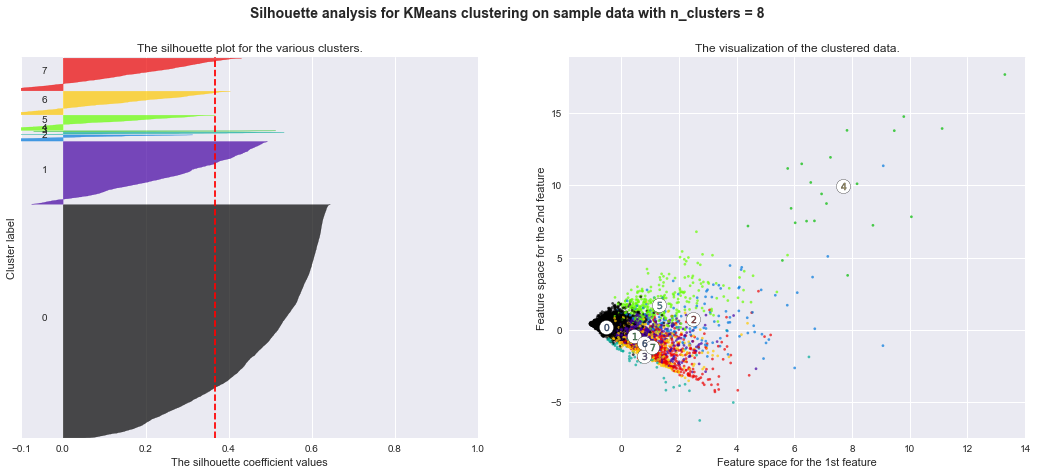

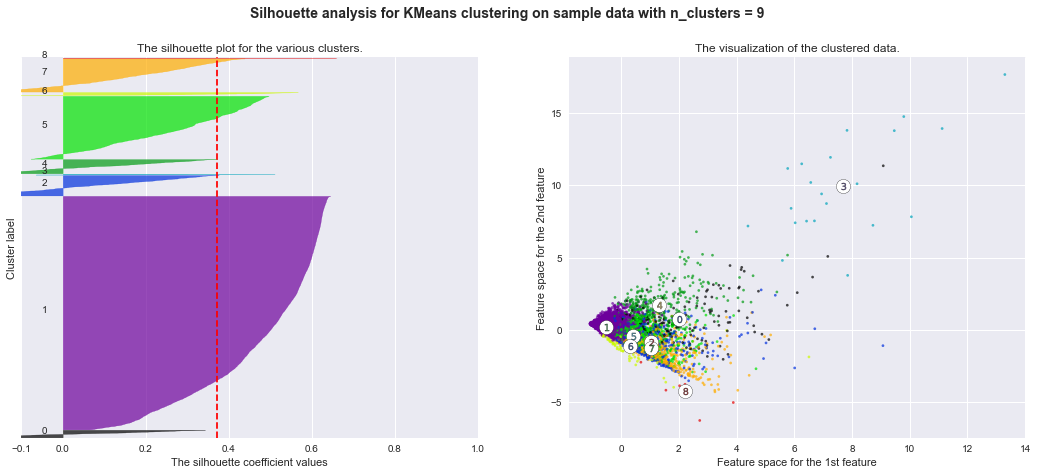

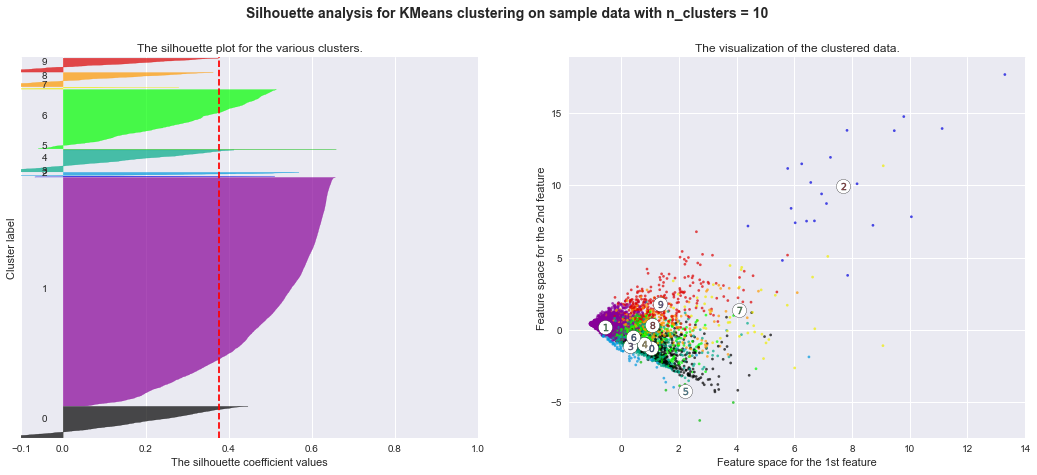

In [31]:
plot_silhouette(k,df_red)

Text(0.5, 0, 'n_clusters')

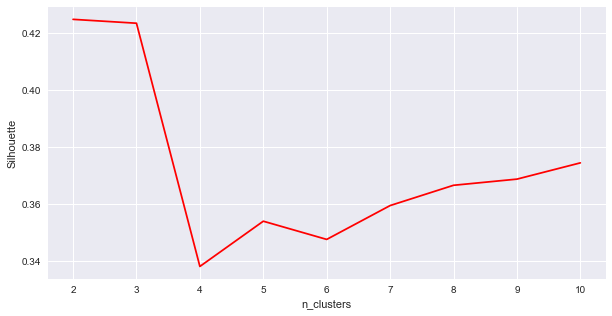

In [32]:
#Visualisasi Silhoutte Score
score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(df_red)

    siluet = silhouette_score(df_red, member, metric='euclidean')
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2,11), score, 'r-')
plt.ylabel('Silhouette')
plt.xlabel('n_clusters')

### Kmeans Clusters 3

In [33]:
#Membuat kmeans dengan n_clusters=2
km_3 = KMeans(n_clusters=3, random_state=33)
label = km_3.fit_predict(df_red)

In [34]:
df['label'] = label
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,321.319929,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [35]:
pca_2 = PCA(n_components=2, whiten=True)
df_pca2d = pca_2.fit_transform(df)
df_pca2d

array([[-0.95851674,  0.3417778 ],
       [ 0.87927819, -0.86787955],
       [ 0.30624018, -0.70606208],
       ...,
       [-0.89928655,  0.48168908],
       [ 0.51218021,  2.09420161],
       [-0.87706307,  0.27910464]])

In [36]:
df_pca2d = pd.DataFrame(df_pca2d)
df_pca2d['label'] = label
df_pca2d

,0,1,label
0,-0.958517,0.341778,0
1,0.879278,-0.867880,2
2,0.306240,-0.706062,1
3,0.268508,-0.487615,1
4,-0.831418,0.281783,0
...,...,...,...
8745,0.018221,-0.851682,0
8746,-0.291512,-0.099011,0
8747,-0.899287,0.481689,0
8748,0.512180,2.094202,0


Text(0, 0.5, 'Purchases')

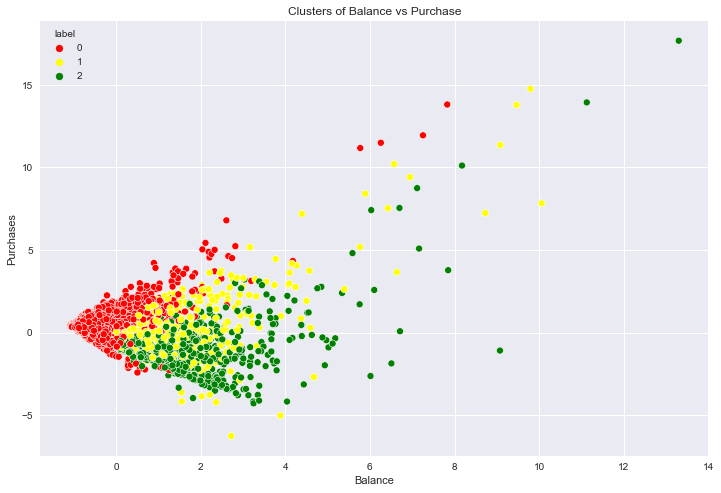

In [37]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_pca2d[0],df_pca2d[1], hue=df_pca2d['label'], palette=['red','yellow','green'])
plt.title('Clusters of Balance vs Purchase')
plt.xlabel('Balance')
plt.ylabel('Purchases')

## Spectral Clustering

In [38]:
scl = sc(n_clusters=3, gamma=0.01).fit(df_red)
label_scl = scl.fit_predict(df_red)

In [39]:
df['label_scl'] = label_scl
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,label,label_scl
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,321.319929,0.000000,12,1,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0


In [40]:
df_pca2d['label scl'] = label_scl
df_pca2d

,0,1,label,label scl
0,-0.958517,0.341778,0,0
1,0.879278,-0.867880,2,0
2,0.306240,-0.706062,1,0
3,0.268508,-0.487615,1,0
4,-0.831418,0.281783,0,0
...,...,...,...,...
8745,0.018221,-0.851682,0,0
8746,-0.291512,-0.099011,0,0
8747,-0.899287,0.481689,0,0
8748,0.512180,2.094202,0,0


Text(0, 0.5, 'Purchases')

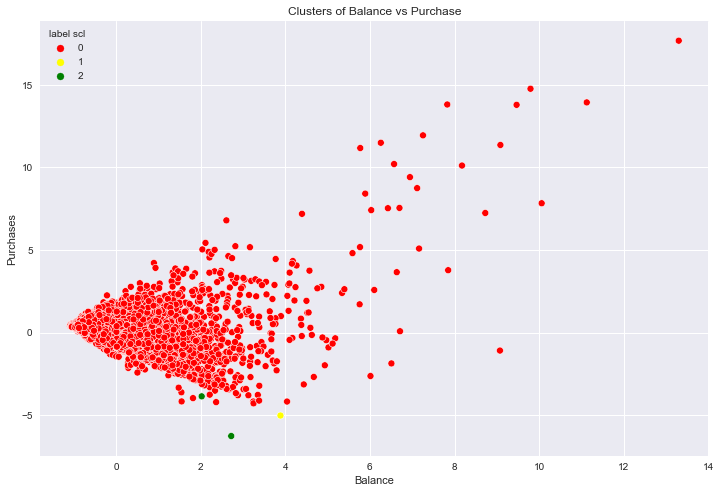

In [41]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_pca2d[0],df_pca2d[1], hue=df_pca2d['label scl'], palette=['red','yellow','green'])
plt.title('Clusters of Balance vs Purchase')
plt.xlabel('Balance')
plt.ylabel('Purchases')

## Agglomerative Clustering

In [42]:
ac = AC(linkage='ward').fit(df_red)
label_ac = ac.fit_predict(df_red)

In [43]:
df['label_ac'] = label_ac
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,label,label_scl,label_ac
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,321.319929,0.000000,12,1,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0


In [44]:
df_pca2d['label ac'] = label_ac
df_pca2d

,0,1,label,label scl,label ac
0,-0.958517,0.341778,0,0,0
1,0.879278,-0.867880,2,0,0
2,0.306240,-0.706062,1,0,0
3,0.268508,-0.487615,1,0,0
4,-0.831418,0.281783,0,0,0
...,...,...,...,...,...
8745,0.018221,-0.851682,0,0,0
8746,-0.291512,-0.099011,0,0,0
8747,-0.899287,0.481689,0,0,0
8748,0.512180,2.094202,0,0,0


Text(0, 0.5, 'Purchases')

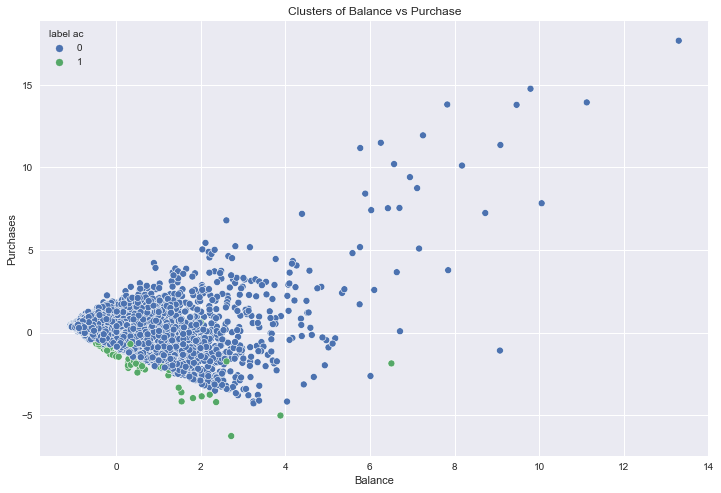

In [45]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_pca2d[0],df_pca2d[1], hue=df_pca2d['label ac'])
plt.title('Clusters of Balance vs Purchase')
plt.xlabel('Balance')
plt.ylabel('Purchases')

# Model Inference Model KMeans

In [46]:
test_for_inference.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8750,8.346980,0.181818,390.0,0.0,390.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1500.0,410.528786,30.784961,0.000000,12
8751,0.546067,0.090909,228.0,0.0,228.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,238.695115,16.127297,0.000000,12
8752,0.979061,0.272727,0.0,0.0,0.0,329.930650,0.0,0.000000,0.000000,0.083333,1,0,500.0,1316.748413,1.721007,1.000000,12
8753,0.223351,0.090909,336.0,0.0,336.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.000000,12
8754,455.471255,1.000000,389.7,44.7,345.0,276.902382,1.0,0.083333,0.916667,0.083333,4,14,1000.0,48.594194,3644.171310,0.090909,12


In [47]:
pipe_km = Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('KMeans', KMeans(n_clusters=3, random_state=33))
])

In [48]:
label_test = pipe_km.fit_predict(test_for_inference)

In [49]:
test_for_inference['label_test'] = label_test
test_for_inference.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,label_test
8750,8.346980,0.181818,390.0,0.0,390.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1500.0,410.528786,30.784961,0.000000,12,1
8751,0.546067,0.090909,228.0,0.0,228.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,238.695115,16.127297,0.000000,12,1
8752,0.979061,0.272727,0.0,0.0,0.0,329.930650,0.0,0.000000,0.000000,0.083333,1,0,500.0,1316.748413,1.721007,1.000000,12,0
8753,0.223351,0.090909,336.0,0.0,336.0,0.000000,1.0,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.000000,12,1
8754,455.471255,1.000000,389.7,44.7,345.0,276.902382,1.0,0.083333,0.916667,0.083333,4,14,1000.0,48.594194,3644.171310,0.090909,12,1


Text(0, 0.5, 'Purchases')

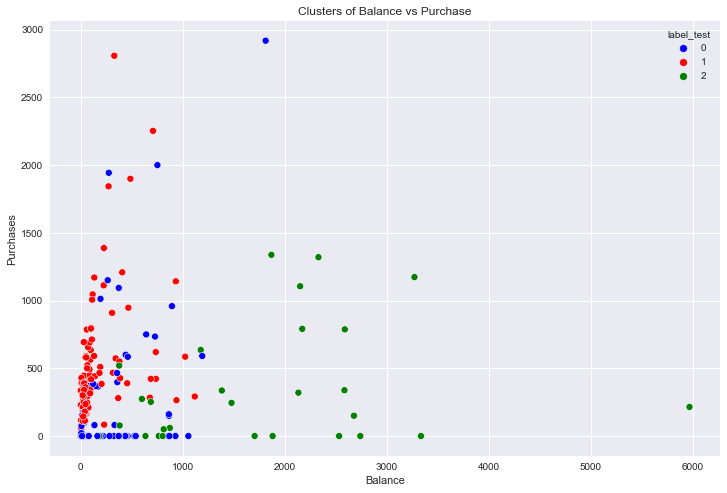

In [50]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(test_for_inference['balance'],test_for_inference['purchases'], hue=test_for_inference['label_test'], palette=['blue','red', 'green'])
plt.title('Clusters of Balance vs Purchase')
plt.xlabel('Balance')
plt.ylabel('Purchases')

# Conclussion

Text(0.5, 1.0, 'Clusters Model KMeans')

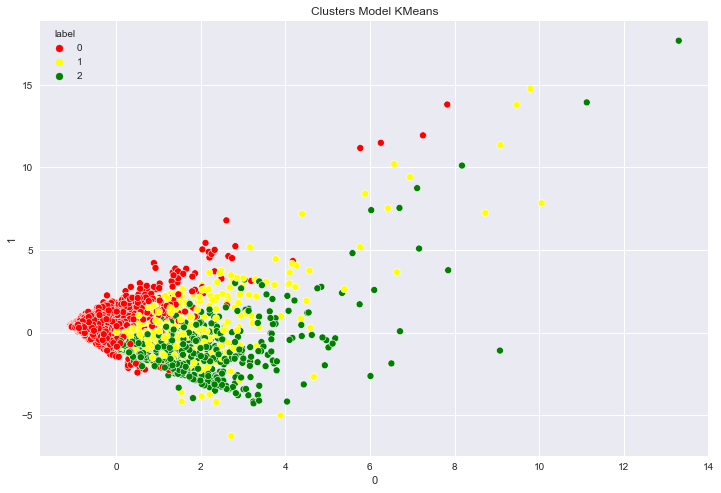

In [51]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_pca2d[0],df_pca2d[1], hue=df_pca2d['label'], palette=['red','yellow', 'green'])
plt.title('Clusters Model KMeans')

In [52]:
#Mengecek karakteristik cluster
cluster_1 = df.query('label == 0')
cluster_2 = df.query('label == 1')
cluster_3 = df.query('label == 2')

Text(0.5, 1.0, 'Clusters Model KMeans Purchases vs Credit Limit')

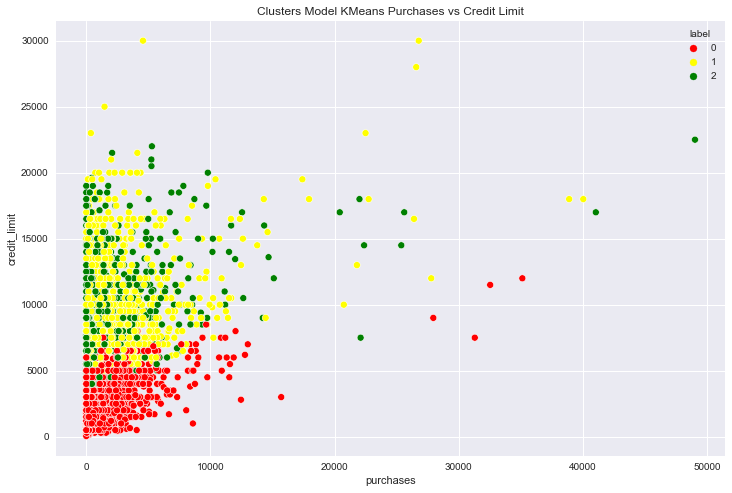

In [53]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df['purchases'],df['credit_limit'], hue=df['label'], palette=['red','yellow', 'green'])
plt.title('Clusters Model KMeans Purchases vs Credit Limit')

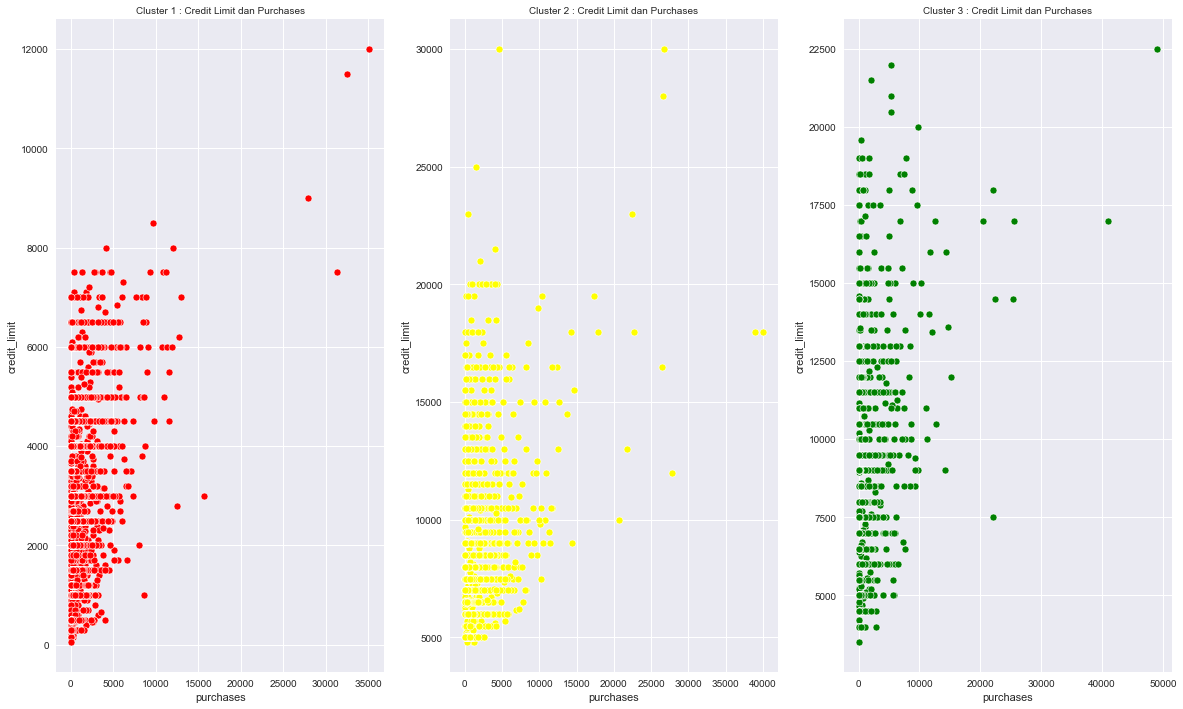

In [54]:
#Plot tiap cluster membandingkan apakah credit limit berpengaruh terhadap pembelian
plt.rcParams['figure.figsize'] = (20,12)

plt.subplot(1,3,1)
sns.scatterplot(cluster_1['purchases'],cluster_1['credit_limit'], color='red')
plt.title('Cluster 1 : Credit Limit dan Purchases', fontsize =10)

plt.subplot(1,3,2)
sns.scatterplot(cluster_2['purchases'],cluster_2['credit_limit'], color='yellow')
plt.title('Cluster 2 : Credit Limit dan Purchases', fontsize =10)

plt.subplot(1,3,3)
sns.scatterplot(cluster_3['purchases'],cluster_3['credit_limit'], color='green')
plt.title('Cluster 3 : Credit Limit dan Purchases', fontsize =10)

plt.show()

Karakteristik tiap cluster dari pengaruh credit limit terhadap purchases  
  
Cluster 1  
-   Memiliki Credit limit range sekitar 0-7000 dengan purchases range sekitar 0-5000  
-   Cluster 1 bisa dibilang memiliki karakteristik melakukan pembelian sesuai dengan kredit limitnya.  
  
Cluster 2  
-   Memiliki Credit limit range sekitar 5000-20000 dengan purchases range sekitar 0-10000  
-   Cluster 2 ini memiliki karakteristik ketika meningkatnya credit limit maka meningkat pula pembeliannya.  

Cluster 3  
-   Memiliki Credit limit range sekitar 5000-17500 dengan purchases range sekitar 0-5000  
-   Cluster 3 memiliki credit limit tinggi tetapi tidak melakukan pembelian yang tinggi, mungkin cluster 3 ini meningkatkan credit limit bukan untuk menjadi boros tetapi untuk berjaga-jaga ketika terjadi keadaan darurat yang membutuhkan dana banyak maka bisa tertangani oleh credit limit tersebut.  
  